In [1]:
!pip install colorama

In [2]:
import pandas as pd
from colorama import Fore
import seaborn as sns
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/data.csv',encoding='unicode_escape')

In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541901 non-null  object 
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541887 non-null  object 
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(1), object(7)
memory usage: 33.1+ MB


In [8]:
df['InvoiceDate'] =df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%Y-%m-%d %H:%M")

In [9]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').astype('float64')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce').astype('float64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541896 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541885 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 33.1+ MB


In [11]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,13
InvoiceDate,0
UnitPrice,24
CustomerID,135080
Country,0


In [12]:
df1 = df[df.CustomerID.isnull()]
df2 = df[df.Quantity.isnull()]
df3 = df[df.UnitPrice.isnull()]
print(Fore.LIGHTMAGENTA_EX,"Các dòng trong cột CustomerID chứa giá trị bị thiếu\n",Fore.WHITE,df1) #IN RA DÒNG BỊ THIẾU
print(Fore.LIGHTMAGENTA_EX,"Các dòng trong cột Quantity chứa giá trị bị thiếu\n",Fore.WHITE,df2)
print(Fore.LIGHTMAGENTA_EX,"Các dòng trong cột UnitPrice chứa giá trị bị thiếu\n",Fore.WHITE,df3)

 Các dòng trong cột CustomerID chứa giá trị bị thiếu
         InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN      56.0   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE       1.0   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE       2.0   
1445      536544     21786               POLKADOT RAIN HAT        4.0   
1446      536544     21787            RAIN PONCHO RETROSPOT       2.0   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT       5.0   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE       4.0   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN       1.0   
541539    581498     85174                S/4 CACTI CANDLES       1.0   
541540    581498       DOT                   DOTCOM POSTAGE       1.0   

               InvoiceDate  UnitPrice  CustomerID         Country  


In [13]:
# Kiểm tra giá trị âm trong cột Quantity
negative_quantity = df[df['Quantity'] < 0]
print("Số lượng giá trị âm trong Quantity:", len(negative_quantity))

# Kiểm tra giá trị âm trong cột UnitPrice
negative_unitprice = df[df['UnitPrice'] < 0]
print("Số lượng giá trị âm trong UnitPrice:", len(negative_unitprice))

Số lượng giá trị âm trong Quantity: 10624
Số lượng giá trị âm trong UnitPrice: 2


In [14]:
# Chuyển giá trị âm trong Quantity về dương
df['Quantity'] = df['Quantity'].abs()

# Chuyển giá trị âm trong UnitPrice về dương
df['UnitPrice'] = df['UnitPrice'].abs()

# Kiểm tra lại xem còn giá trị âm không
negative_quantity = df[df['Quantity'] < 0]
print("Số lượng giá trị âm trong Quantity:", len(negative_quantity))

negative_unitprice = df[df['UnitPrice'] < 0]
print("Số lượng giá trị âm trong UnitPrice:", len(negative_unitprice))

Số lượng giá trị âm trong Quantity: 0
Số lượng giá trị âm trong UnitPrice: 0


In [15]:
# Kiểm tra giá trị 0 trong cột Quantity
zero_quantity = df[df['Quantity'] == 0]
print("Số lượng giá trị 0 trong Quantity:", len(zero_quantity))

# Kiểm tra giá trị 0 trong cột UnitPrice
zero_unitprice = df[df['UnitPrice'] == 0]
print("Số lượng giá trị 0 trong UnitPrice:", len(zero_unitprice))

Số lượng giá trị 0 trong Quantity: 0
Số lượng giá trị 0 trong UnitPrice: 2515


In [16]:
# Tính mean của UnitPrice trước khi loại bỏ
mean_before = df['UnitPrice'].mean()
print(f"Mean của UnitPrice trước khi loại bỏ: {mean_before:.2f}")

# Loại bỏ các dòng có UnitPrice bằng 0
df = df[df['UnitPrice'] != 0]

# Tính mean của UnitPrice sau khi loại bỏ
mean_after = df['UnitPrice'].mean()
print(f"Mean của UnitPrice sau khi loại bỏ: {mean_after:.2f}")

# So sánh mean trước và sau khi loại bỏ
print(f"Sự thay đổi mean: {mean_after - mean_before:.2f}")

Mean của UnitPrice trước khi loại bỏ: 4.69
Mean của UnitPrice sau khi loại bỏ: 4.71
Sự thay đổi mean: 0.02


In [17]:
# Kiểm tra giá trị 0 trong cột Quantity
zero_quantity = df[df['Quantity'] == 0]
print("Số lượng giá trị 0 trong Quantity:", len(zero_quantity))

# Kiểm tra giá trị 0 trong cột UnitPrice
zero_unitprice = df[df['UnitPrice'] == 0]
print("Số lượng giá trị 0 trong UnitPrice:", len(zero_unitprice))

Số lượng giá trị 0 trong Quantity: 0
Số lượng giá trị 0 trong UnitPrice: 0


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
# Tạo DataFrame mới chỉ chứa các dòng không bị thiếu ở cả Quantity và UnitPrice
df_cleaned = df.dropna(subset=['Quantity', 'UnitPrice'])

# So sánh mean và median cho Quantity và UnitPrice
for col in ['Quantity', 'UnitPrice']:
    mean_original = df[col].mean()
    median_original = df[col].median()
    mean_cleaned = df_cleaned[col].mean()
    median_cleaned = df_cleaned[col].median()

    print(f"--- {col} ---")
    print(f"Mean (original): {mean_original:.2f}")
    print(f"Median (original): {median_original:.2f}")
    print(f"Mean (cleaned): {mean_cleaned:.2f}")



--- Quantity ---
Mean (original): 10.88
Median (original): 3.00
Mean (cleaned): 10.88
--- UnitPrice ---
Mean (original): 4.71
Median (original): 2.08
Mean (cleaned): 4.71


In [19]:
df_cleaned.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,132582
Country,0


In [20]:
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_cleaned['Revenue']

,Revenue
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
...,...
541904,10.20
541905,12.60
541906,16.60
541907,16.60


## KHAI PHÁ DỮ LIỆU ###

In [21]:
print("Số Khách Hàng Đã Mua Hàng: ",df_cleaned.StockCode.nunique())
print('\n')
print("Số Đơn Hàng Được Mua Theo Nước: ",df_cleaned.Country.value_counts())

Số Khách Hàng Đã Mua Hàng:  3938


Số Đơn Hàng Được Mua Theo Nước:  Country
United Kingdom          492946
Germany                   9491
France                    8556
EIRE                      8192
Spain                     2532
Netherlands               2367
Belgium                   2069
Switzerland               2001
Portugal                  1519
Australia                 1256
Norway                    1085
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates     

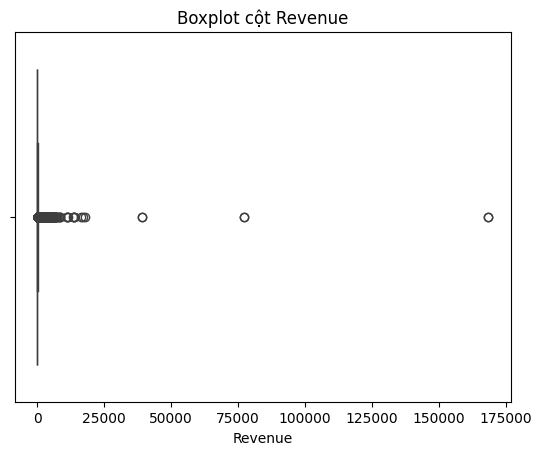

In [22]:
# Vẽ biểu đồ boxplot
sns.boxplot(x=df_cleaned['Revenue'], orient='horizontal')
plt.title('Boxplot cột Revenue')
plt.show()

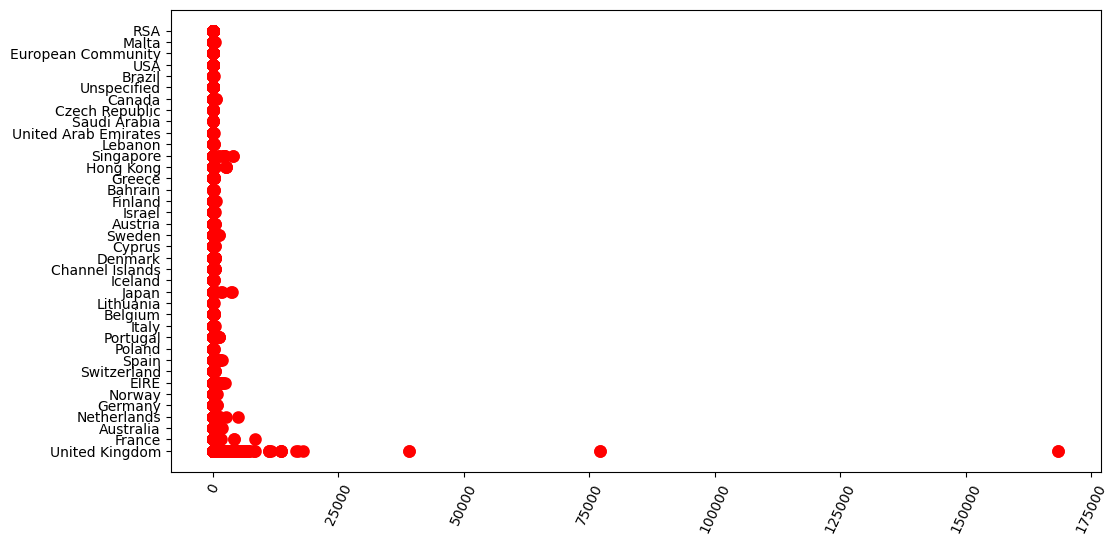

In [23]:
#Vẽ biểu đồ scatterplot
plt.figure(figsize = (12,6))
plt.xticks(rotation=65,size=10)
plot = plt.scatter(df_cleaned['Revenue'], df_cleaned['Country'], color = 'r',linewidths = 2,s = 50)
plt.show()

In [24]:
# Tính toán quartiles Q1, Q3 và IQR
Q1 = df_cleaned['Revenue'].quantile(0.25)
Q3 = df_cleaned['Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Xác định giới hạn trên và dưới để phát hiện outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tạo danh sách để lưu trữ outliers
outliers_list = df_cleaned['Revenue'][(df_cleaned['Revenue'] < lower_bound) | (df_cleaned['Revenue'] > upper_bound)].tolist()

# Hoặc tạo NumPy array để lưu trữ outliers
outliers_array = df_cleaned['Revenue'][(df_cleaned['Revenue'] < lower_bound) | (df_cleaned['Revenue'] > upper_bound)].values

# In ra các outliers
print("Outliers (list):", outliers_list)
print("Outliers (array):", outliers_array)

Outliers (list): [54.08, 90.0, 90.0, 45.0, 40.8, 53.1, 70.80000000000001, 46.8, 46.8, 46.8, 39.599999999999994, 70.80000000000001, 45.0, 54.0, 204.0, 350.4, 165.60000000000002, 163.2, 45.0, 50.4, 60.0, 97.75, 67.5, 92.5, 71.4, 67.8, 58.0, 102.0, 41.7, 87.6, 178.20000000000002, 165.0, 165.0, 733.4399999999999, 647.04, 647.04, 626.4, 540.0, 51.0, 39.6, 39.599999999999994, 45.0, 68.0, 92.16, 102.0, 163.2, 72.0, 72.5, 51.0, 61.44, 61.44, 46.08, 198.0, 102.0, 81.36, 90.0, 71.03999999999999, 120.0, 165.0, 41.400000000000006, 39.599999999999994, 165.0, 79.6, 177.60000000000002, 177.60000000000002, 177.60000000000002, 177.60000000000002, 59.400000000000006, 45.0, 60.0, 81.6, 54.08, 100.80000000000001, 100.80000000000001, 71.5, 55.800000000000004, 223.20000000000002, 51.0, 44.550000000000004, 44.550000000000004, 102.0, 102.0, 153.0, 177.60000000000002, 39.599999999999994, 326.4, 71.5, 39.8, 90.0, 39.8, 39.8, 39.6, 79.2, 39.6, 212.0, 244.08, 144.0, 60.0, 122.04, 60.0, 60.0, 40.56, 88.80000000000

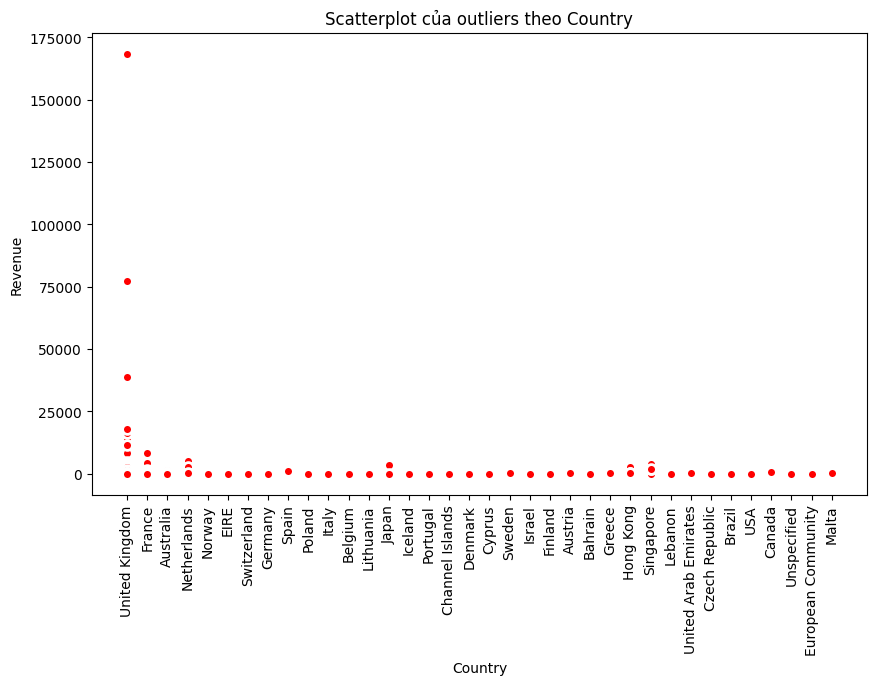

In [25]:
# Tính toán quartiles Q1, Q3 và IQR cho Revenue
Q1 = df_cleaned['Revenue'].quantile(0.25)
Q3 = df_cleaned['Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Xác định giới hạn trên và dưới để phát hiện outliers cho Revenue
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc DataFrame để loại bỏ outliers dựa trên Revenue
filtered_df = df_cleaned[(df_cleaned['Revenue'] >= lower_bound) & (df_cleaned['Revenue'] <= upper_bound)]

# Lọc DataFrame để lấy outliers dựa trên Revenue
outliers_df = df_cleaned[(df_cleaned['Revenue'] < lower_bound) | (df_cleaned['Revenue'] > upper_bound)]

# Vẽ scatterplot của outliers theo Country dựa trên Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Country', y='Revenue', data=outliers_df,color = 'r',linewidths = 2,s = 50) # Thay đổi ở đây
plt.title('Scatterplot của outliers theo Country')
plt.xticks(rotation=90)
plt.show()

In [26]:
percentage_outliers = (len(outliers_df) / len(df_cleaned)) * 100
print(f"Phần trăm outliers trong tổng dữ liệu: {percentage_outliers:.2f}%")

Phần trăm outliers trong tổng dữ liệu: 8.12%


     Month         Country  Count
245     11  United Kingdom   5241
272     12  United Kingdom   4789
224     10  United Kingdom   3636
200      9  United Kingdom   3518
109      5  United Kingdom   2742
..     ...             ...    ...
123      6         Iceland      1
246     11     Unspecified      1
249     12         Bahrain      1
55       3          Greece      1
1        1         Bahrain      1

[273 rows x 3 columns]


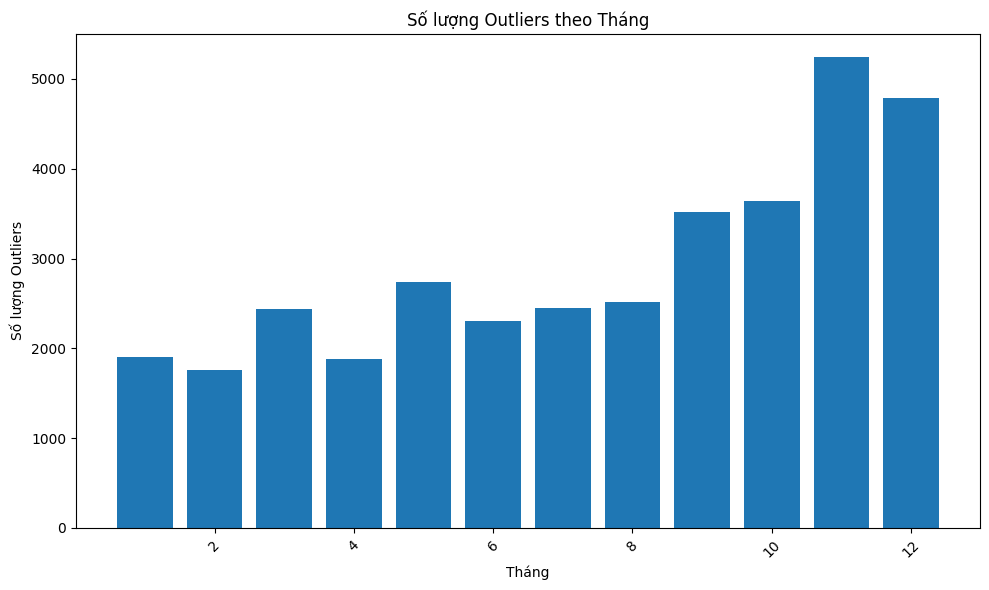

In [27]:
# Trích xuất tháng từ cột InvoiceDate và lưu vào cột mới 'Month'
outliers_df['Month'] =  outliers_df['InvoiceDate'].dt.month

# Gom nhóm outliers theo tháng và quốc gia, đếm số lượng
outlier_counts = outliers_df.groupby(['Month', 'Country'])['Revenue'].count().reset_index()

# Đổi tên cột 'Revenue' thành 'Count' để dễ hiểu
outlier_counts = outlier_counts.rename(columns={'Revenue': 'Count'})

# Sắp xếp theo số lượng outliers giảm dần
outlier_counts = outlier_counts.sort_values(by=['Count'], ascending=False)

# In ra kết quả
print(outlier_counts)

# Vẽ biểu đồ bar chart
plt.figure(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ nếu cần
plt.bar(outlier_counts['Month'], outlier_counts['Count'])  # Vẽ biểu đồ cột
plt.title('Số lượng Outliers theo Tháng')  # Tiêu đề biểu đồ
plt.xlabel('Tháng')  # Nhãn trục x
plt.ylabel('Số lượng Outliers')  # Nhãn trục y
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần
plt.tight_layout()  # Điều chỉnh bố cục để tránh chồng chéo
plt.show()  # Hiển thị biểu đồ

     Month         Country         Sum
272     12  United Kingdom  1049141.55
245     11  United Kingdom   693494.40
224     10  United Kingdom   490068.64
200      9  United Kingdom   476391.30
22       1  United Kingdom   412273.08
..     ...             ...         ...
55       3          Greece       44.25
124      6           Italy       42.96
194      9          Poland       40.00
37       2          Norway       40.00
31       2         Finland       40.00

[273 rows x 3 columns]


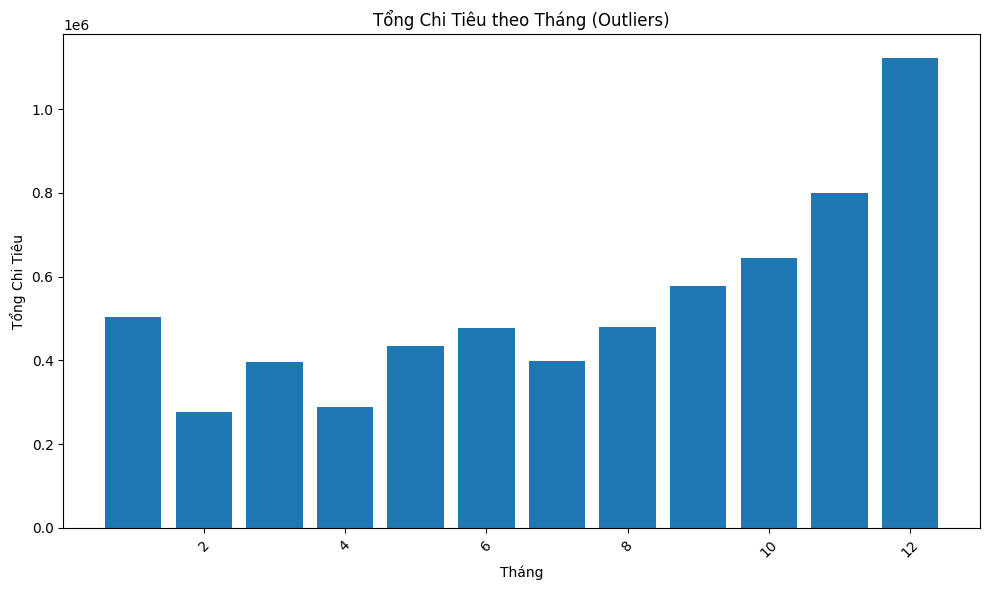

In [28]:
# Gom nhóm outliers theo tháng và quốc gia, đếm số lượng
outlier_sum = outliers_df.groupby(['Month', 'Country'])['Revenue'].sum().reset_index()

# Đổi tên cột 'Revenue' thành 'Count' để dễ hiểu
outlier_sum = outlier_sum.rename(columns={'Revenue': 'Sum'})

# Sắp xếp theo số lượng outliers giảm dần
outlier_sum = outlier_sum.sort_values(by=['Sum'], ascending=False)

# In ra kết quả
print(outlier_sum)

# Gom nhóm dữ liệu theo tháng và tính tổng chi tiêu
monthly_spending = outlier_sum.groupby('Month')['Sum'].sum().reset_index()

# Vẽ biểu đồ bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_spending['Month'], monthly_spending['Sum'])
plt.title('Tổng Chi Tiêu theo Tháng (Outliers)')
plt.xlabel('Tháng')
plt.ylabel('Tổng Chi Tiêu')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần
plt.tight_layout()
plt.show()

## TỶ LỆ RỜI BỎ ##
Tỷ lệ rời bỏ được tính bằng cách chia số lượng khách hàng bị rời bỏ cho tổng số khách hàng.

Trong mã này, em sử dụng groupby() và transform() để tạo cột 'Churned'. Cột này là True đối với những khách hàng không mua hàng trong tháng qua.

Sau đó, em sử dụng sum() và nunique() để tính toán tỷ lệ rời bỏ.

In [29]:
df_cleaned['Churned'] = df_cleaned.groupby('CustomerID')['InvoiceDate'].transform('max') < df_cleaned['InvoiceDate'].max() - pd.DateOffset(months=1)
# Tính tỷ lệ rời bỏ
churn_rate = df_cleaned['Churned'].sum() / df_cleaned['CustomerID'].nunique()

# In tỷ lệ rời bỏ
print(f'Tỷ lệ rời bỏ: {churn_rate:.2f}')

Tỷ lệ rời bỏ: 30.29


## MÔ HÌNH DỰ ĐOÁN TỶ LỆ RỜI BỎ ##

In [30]:
# Chọn ngày tham chiếu để tính toán Recency
snapshot_date = df_cleaned['InvoiceDate'].max() + timedelta(days=1)
# Tính toán Recency, Frequency, MonetaryValue
customer_data = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'Revenue': 'sum'  # MonetaryValue
}).reset_index()

# Đổi tên cột
customer_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Revenue': 'MonetaryValue'
}, inplace=True)

# Gộp cột 'Churned' vào customer_data
customer_data = pd.merge(customer_data, df_cleaned[['CustomerID', 'Churned']].drop_duplicates(), on='CustomerID')

# Chọn đặc trưng và biến mục tiêu
X = customer_data[['Recency', 'Frequency', 'MonetaryValue']]
y = customer_data['Churned']

In [31]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.naive_bayes import GaussianNB

# Khởi tạo mô hình Naive Bayes
model = GaussianNB()

# Huấn luyện mô hình
model.fit(X_train, y_train)

GaussianNB()

In [33]:
from sklearn.metrics import accuracy_score, classification_report

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác: {accuracy:.2f}")

# In ra báo cáo phân loại
print(classification_report(y_test, y_pred))

Độ chính xác: 0.84
              precision    recall  f1-score   support

       False       0.95      0.60      0.73       329
        True       0.80      0.98      0.88       546

    accuracy                           0.84       875
   macro avg       0.87      0.79      0.81       875
weighted avg       0.86      0.84      0.82       875



In [34]:
# Dự đoán trên toàn bộ dữ liệu
all_predictions = model.predict(X)

In [35]:
# Tạo DataFrame mới
predicted_data = customer_data.copy()  # Sao chép DataFrame ban đầu
predicted_data['Predicted_Churned'] = all_predictions

In [36]:
# Lọc khách hàng rời bỏ
churned_customers = predicted_data[predicted_data['Predicted_Churned'] == True]
churned_customers

,CustomerID,Recency,Frequency,MonetaryValue,Churned,Predicted_Churned
0,12346.0,326,2,154367.20,True,True
2,12348.0,75,4,1797.24,True,True
3,12349.0,19,1,1757.55,False,True
4,12350.0,310,1,334.40,True,True
6,12353.0,204,1,89.00,True,True
...,...,...,...,...,...,...
4365,18278.0,74,1,173.90,True,True
4366,18280.0,278,1,180.60,True,True
4367,18281.0,181,1,80.82,True,True
4368,18282.0,8,3,179.50,False,True


### MÔ HÌNH RFM ###

In [ ]:
# Tạo RFM table
rfm_table = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'Revenue': 'sum'  # Monetary
})

# Đổi tên cột
rfm_table.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSum': 'MonetaryValue'
}, inplace=True)

rfm_table

,Recency,Frequency,Revenue
CustomerID,,,
12346.0,326,2,154367.20
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,179.50


from matplotlib import pyplot as plt
rfm_table['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rfm_table['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rfm_table['Revenue'].plot(kind='hist', bins=20, title='Revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rfm_table.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rfm_table.plot(kind='scatter', x='Frequency', y='Revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rfm_table['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rfm_table['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rfm_table['Revenue'].plot(kind='line', figsize=(8, 4), title='Revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

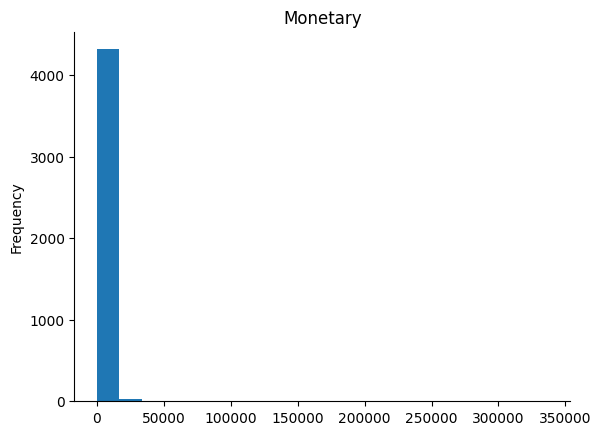

In [ ]:
from matplotlib import pyplot as plt
rfm_table['Revenue'].plot(kind='hist', bins=20, title='Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

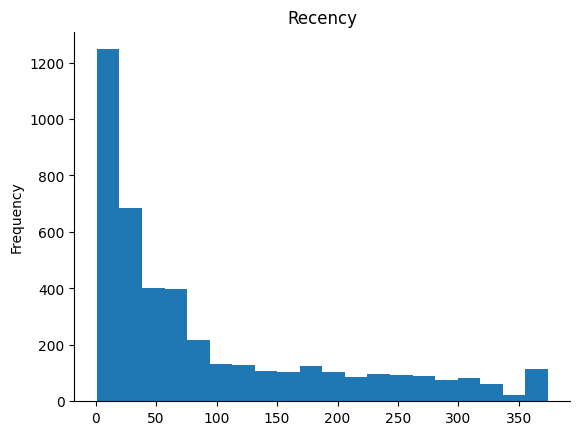

In [ ]:
from matplotlib import pyplot as plt
rfm_table['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

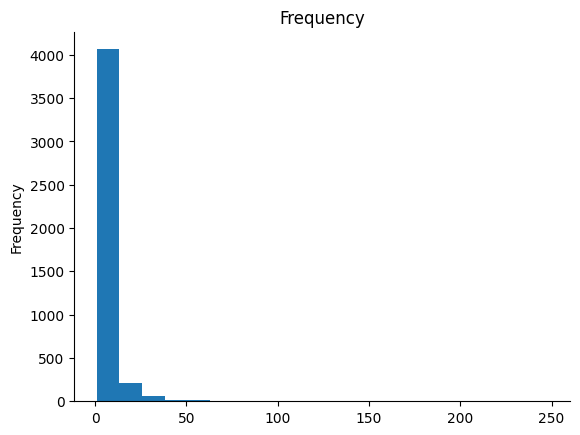

In [ ]:
from matplotlib import pyplot as plt
rfm_table['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Khai phá cột Description

In [ ]:
import pandas as pd
from collections import Counter

# Đếm tần suất xuất hiện của các từ khóa trong mô tả sản phẩm
product_descriptions = df_cleaned['Description'].str.lower().str.split()
word_counts = Counter([word for description in product_descriptions for word in description])

# In ra 10 từ khóa phổ biến nhất
print(word_counts.most_common(10))

[('set', 54545), ('of', 53323), ('bag', 51877), ('red', 42874), ('heart', 38699), ('retrospot', 35105), ('vintage', 33717), ('design', 30038), ('pink', 29511), ('christmas', 25118)]


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    text = text.lower() # Chuyển thành chữ thường
    text = re.sub(r'[^\w\s]', '', text) # Loại bỏ ký tự đặc biệt
    tokens = word_tokenize(text) # Tách từ
    tokens = [token for token in tokens if token not in stopwords.words('english')] # Loại bỏ stop words
    return ' '.join(tokens)

df_cleaned['ProcessedDescription'] = df_cleaned['Description'].apply(preprocess_text)

# Tạo ma trận Document-Term bằng TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
dtm = vectorizer.fit_transform(df_cleaned['ProcessedDescription'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Khởi tạo mô hình LDA với 5 topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)

# Huấn luyện mô hình
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Lấy topic probabilities cho mỗi document (sản phẩm)
topic_probs = lda.transform(dtm)

# Gán topic có xác suất cao nhất cho mỗi sản phẩm
df_cleaned['Topic'] = topic_probs.argmax(axis=1)

In [ ]:
# In ra top 10 từ khóa quan trọng trong mỗi topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 0:
['paisley', 'retrospot', 'pantry', 'party', 'vintage', 'wooden', 'bunting', 'cases', 'cake', 'set']
Topic 1:
['water', 'hot', 'card', 'glass', 'bottle', 'decoration', 'heart', 'tlight', 'holder', 'hanging']
Topic 2:
['pencils', 'bird', 'colour', 'bakelike', 'alarm', 'assorted', 'ivory', 'wall', 'red', 'clock']
Topic 3:
['lunch', 'small', 'girl', 'dolly', 'wicker', 'heart', 'box', 'design', 'metal', 'sign']
Topic 4:
['charlotte', 'christmas', 'tin', 'retrospot', 'pink', 'red', 'vintage', 'lunch', 'jumbo', 'bag']
